<h1 style="color:green;">Healthcare Data Insights & Trends Analysis</h1>

<h2 style="color:green;">Data Loading & Initial Exploration</h2>

<b style="color:blue;">Loading the dataset</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("healthcare_dataset.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,31-01-2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328,Urgent,02-02-2024,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,20-08-2019,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,26-08-2019,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,22-09-2022,Tiffany Mitchell,Cook PLC,Aetna,27955.10,205,Emergency,07-10-2022,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,18-11-2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78,450,Elective,18-12-2020,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,19-09-2022,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,09-10-2022,Penicillin,Abnormal


<b style="color:blue;">Checking the shape and Column details</b>

In [3]:
df.shape

(55500, 15)

In [4]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [6]:
df.nunique()

Name                  49992
Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Billing Amount        49760
Room Number             400
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64

In [7]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316071,301.134829
std,19.602454,14211.454434,115.243069
min,13.000000,-2008.490000,101.000000
25%,35.000000,13241.222500,202.000000
50%,52.000000,25538.065000,302.000000
75%,68.000000,37820.510000,401.000000
max,89.000000,52764.280000,500.000000


<h2 style="color:green;">Data Cleaning & Formatting</h2>

<b style="color:blue;">Checking for Duplicates</b>

In [8]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 534


<b style="color:blue;">Removing Duplicate Rows</b>

In [9]:
df.drop_duplicates(inplace=True)
df.shape

(54966, 15)

<p style="color:purple;">We had 
    <b style="color:red;">534</b> duplicate records which have now been removed. This ensures the accuracy of our analysis by preventing skewed results.</p>

<b style="color:blue;">Converting Date Columns to Datetime Format</b>

In [10]:
df["Date of Admission"] = pd.to_datetime(df["Date of Admission"], format="%d-%m-%Y")
df["Discharge Date"] = pd.to_datetime(df["Discharge Date"], format="%d-%m-%Y")

<p style="color:purple;">Both 
    <b style="color:green;
              background-color:yellow;">Date of Admission</b> and 
    <b style="color:green;
              background-color:yellow;">Discharge Date</b> are now in datetime format. This allows us to perform time-based operations and extract insights like admission trends over time.</p>

<b style="color:blue;">Extracting Time Features</b>

In [11]:
df["Admission Year"] = df["Date of Admission"].dt.year
df["Admission Month"] = df["Date of Admission"].dt.month
df["Discharge Year"] = df["Discharge Date"].dt.year

<p style="color:purple;">We’ve extracted the year and month of admission and discharge. These will be useful later for time series analysis or trend visualizations.</p>

<b style="color:blue;">Final Check on Data Types</b>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                54966 non-null  object        
 1   Age                 54966 non-null  int64         
 2   Gender              54966 non-null  object        
 3   Blood Type          54966 non-null  object        
 4   Medical Condition   54966 non-null  object        
 5   Date of Admission   54966 non-null  datetime64[ns]
 6   Doctor              54966 non-null  object        
 7   Hospital            54966 non-null  object        
 8   Insurance Provider  54966 non-null  object        
 9   Billing Amount      54966 non-null  float64       
 10  Room Number         54966 non-null  int64         
 11  Admission Type      54966 non-null  object        
 12  Discharge Date      54966 non-null  datetime64[ns]
 13  Medication          54966 non-null  object        


<h2 style="color:green;">Univariate Analysis (Variable-wise Exploration)</h2>

<p style="color:purple;">In Univariate Analysis, we’ll explore each column individually to:</p>

- <p style="color:purple;">Understand the distribution</p>
- <p style="color:purple;">Detect outliers</p>
- <p style="color:purple;">Spot skews or imbalances</p>
- <p style="color:purple;">Know how each variable behaves in isolation</p>

### `Age` (Numerical Feature)

<b style="color:blue;">Summary Statistics</b>

In [13]:
df["Age"].describe()

count    54966.000000
mean        51.535185
std         19.605661
min         13.000000
25%         35.000000
50%         52.000000
75%         68.000000
max         89.000000
Name: Age, dtype: float64

<b style="color:blue;">Distribution Plot</b>

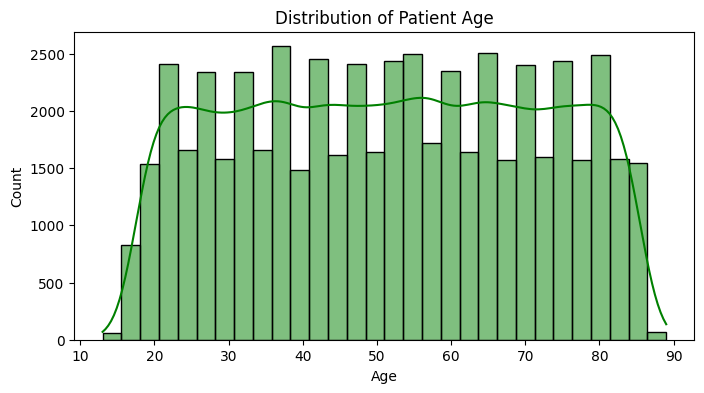

In [14]:
plt.figure(figsize=(8, 4))
sns.histplot(df["Age"], bins=30, kde=True, color='g')
plt.title("Distribution of Patient Age")
plt.show()

<b style="color:blue;">Age Distribution</b>

- <p style="color:purple;">Most patients are between 
    <b style="color:green; background-color:yellow;">35 to 68</b> years old. as indicated by the interquartile range (25th to 75th percentile).</p>
- <p style="color:purple;">The age distribution is 
    <b style="color:green; 
              background-color:yellow;">slightly right-skewed</b>, with a median age of 52 years and a mean of 51.5 years. The distribution peaks around the early 50s, reflecting the median.</p>
- <p style="color:purple;">This summary helps us understand that the majority of patients are middle-aged to older adults, and it can also highlight unusual entries, such as those below 
    <b style="color:green; background-color:yellow;">13 or above 89</b> years, which are outside the observed range.</p>

### `Billing Amount`  (Numerical Feature)

<b style="color:blue;">Summary Statistics</b>

In [15]:
df["Billing Amount"].describe().round(2)

count    54966.00
mean     25544.31
std      14208.41
min      -2008.49
25%      13243.72
50%      25542.75
75%      37819.86
max      52764.28
Name: Billing Amount, dtype: float64

<b style="color:blue;">Distribution Plot</b>

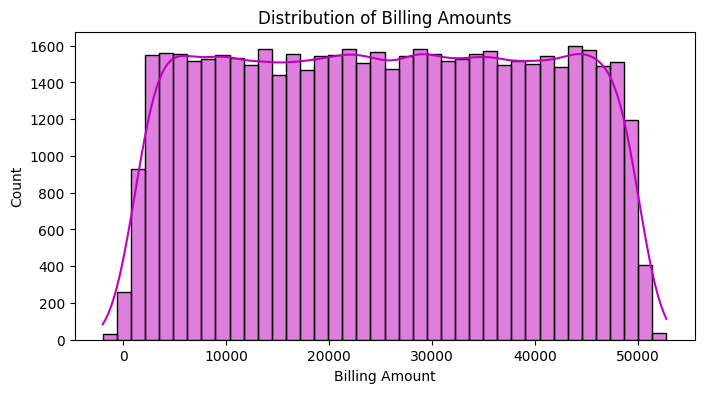

In [16]:
plt.figure(figsize=(8, 4))
sns.histplot(df["Billing Amount"], bins=40, kde=True, color='m')
plt.title("Distribution of Billing Amounts")
plt.show()

<b style="color:blue;">Billing Amount Distribution</b>

- <p style="color:purple;">The average billing amount is around 
    <b style="color:red;">\$25544.31</b> with a max of 
    <b style="color:red;">\$52764.28</b>.</p>
- <p style="color:purple;">The data appears to be fairly uniform across the range, as seen in the histogram, with no strong skewness. However, there are a few negative and extremely high values, which may be outliers.</p>

### `Gender` and `Blood Type` (Categorical Features)

<b style="color:blue;">Gender</b>

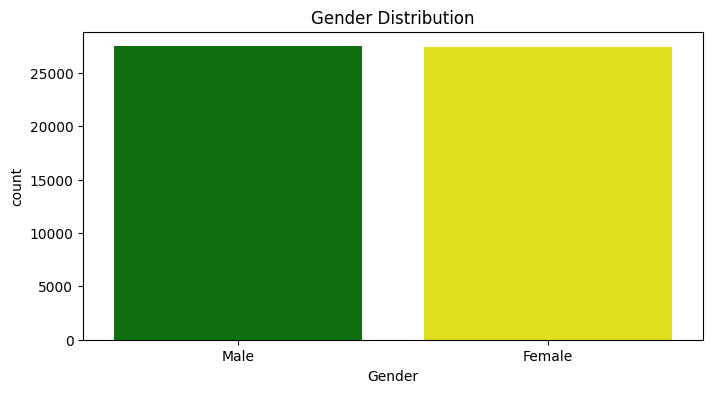

In [26]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Gender", palette=["green", "yellow"])
plt.title("Gender Distribution")
plt.show()

<b style="color:blue;">Blood Type</b>

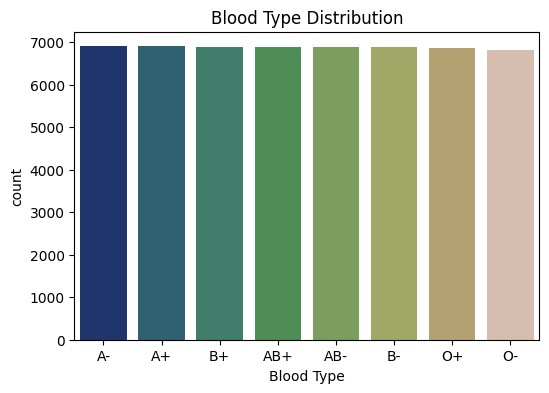

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Blood Type", 
              order=df["Blood Type"].value_counts().index, 
              palette="gist_earth")
plt.title("Blood Type Distribution")
plt.show()

<b style="color:blue;">Gender Distribution</b>

- <p style="color:purple;">The gender split is almost equal, with 
    <b style="color:red;">27774</b> males and 
    <b style="color:red;">27726</b> females.</p>
- <p style="color:purple;">While this balance is ideal from an analysis standpoint, it doesn't reveal any standout insight or imbalance.</p>

<b style="color:blue;">Blood Type Distribution</b>

- <p style="color:purple;">Blood types are nearly evenly distributed across all categories.</p>
- <p style="color:purple;">This uniformity is not reflective of real-world population distributions and likely indicates synthetic or anonymized data.</p>
- <p style="color:purple;">We found no significant trends or anomalies in this feature.</p>

### High Cardinality Categorical Columns

<b style="color:blue;">Top 5 most frequent Doctors</b>

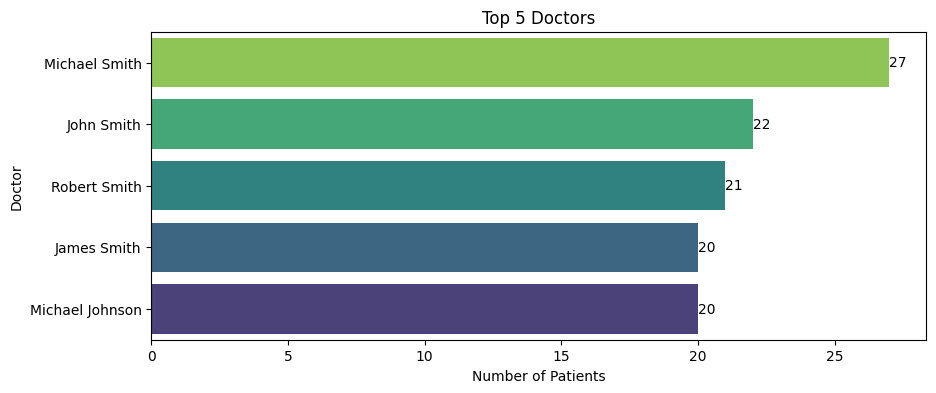

In [21]:
top_doctors = df["Doctor"].value_counts().head()

plt.figure(figsize=(10, 4))
sns.barplot(x=top_doctors.values, y=top_doctors.index, palette="viridis_r")

plt.title("Top 5 most frequent Doctors")
plt.xlabel("Number of Patients")
plt.ylabel("Doctor")

for index, value in enumerate(top_doctors.values):
    plt.text(value, index, str(value), va="center")

plt.show()

<b style="color:blue;">Top 5 most admitted Hostpitals</b>

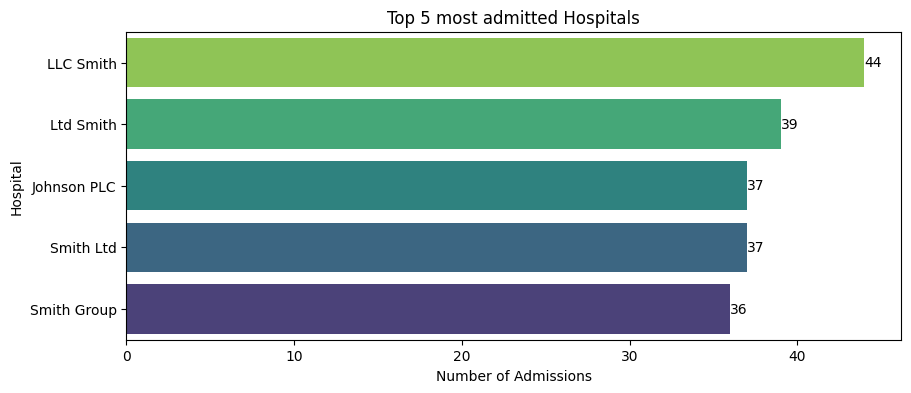

In [23]:
top_hospitals = df["Hospital"].value_counts().head()

plt.figure(figsize=(10, 4))
sns.barplot(x=top_hospitals.values, y=top_hospitals.index, palette="viridis_r")

plt.title("Top 5 most admitted Hospitals")
plt.xlabel("Number of Admissions")
plt.ylabel("Hospital")

for index, value in enumerate(top_hospitals.values):
    plt.text(value, index, str(value), va="center")

plt.show()

<b style="color:blue;">Features with no significant trends or anomalies.</b>

In [28]:
df["Medical Condition"].value_counts()

Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64

In [29]:
df["Insurance Provider"].value_counts()

Insurance Provider
Cigna               11139
Medicare            11039
UnitedHealthcare    11014
Blue Cross          10952
Aetna               10822
Name: count, dtype: int64

In [30]:
df["Medication"].value_counts()

Medication
Lipitor        11038
Ibuprofen      11023
Aspirin        10984
Paracetamol    10965
Penicillin     10956
Name: count, dtype: int64

<h2 style="color:green;">Time-Based Trends</h2>

<b style="color:blue;">Number of Admissions Per Year</b>

In [34]:
admissions_per_year = df["Admission Year"].value_counts().sort_index()
admissions_per_year

Admission Year
2019     7300
2020    11172
2021    10816
2022    10915
2023    10936
2024     3827
Name: count, dtype: int64

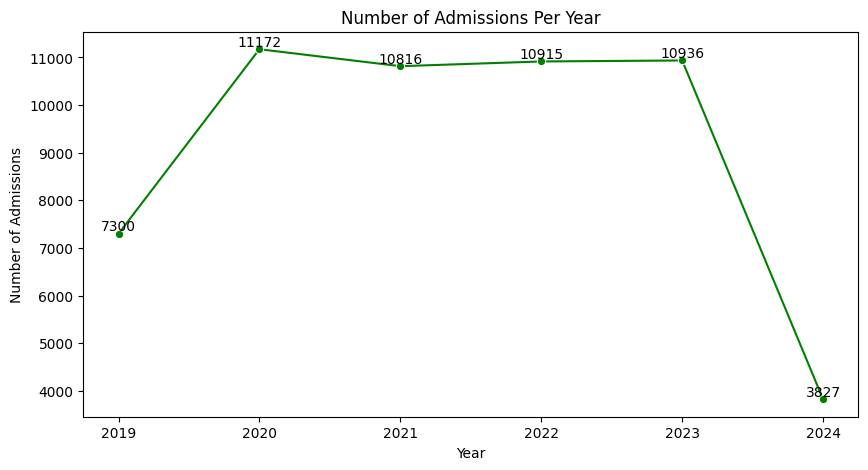

In [38]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=admissions_per_year.index, 
             y=admissions_per_year.values, 
             marker="o", 
             color="g")

plt.title("Number of Admissions Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Admissions")

for x, y in zip(admissions_per_year.index, admissions_per_year.values):
    plt.text(x, y, str(y), ha="center", va="bottom")

plt.show()

<p style="color:purple;">The number of hospital admissions shows a noticeable 
    <b style="color:green; 
              background-color:yellow;">increase starting from 2019 (7,300)</b>, peaking around 
    <b style="color:green; 
              background-color:yellow;">2020 to 2023</b> with each year recording over 
    <b style="color:green; 
              background-color:yellow;">10,000 admissions</b>. The year 2024, however, shows significantly fewer admissions (3,826), likely due to incomplete data, as the year may not be fully recorded yet. This upward trend from 
    <b style="color:green; 
              background-color:yellow;">2019 to 2023</b> could reflect:</p>
              
- <p style="color:purple;">A growing patient base or data collection expansion.</p>
- <p style="color:purple;">Possible healthcare demand increase due to events like the COVID-19 pandemic (especially in 2020).</p>
<p style="color:purple;">The 2024 drop is not necessarily meaningful and should be interpreted with caution.</p>

<b style="color:blue;">Monthly Admission Trend</b>

In [39]:
monthly_admissions = df["Admission Month"].value_counts().sort_index()
monthly_admissions

Admission Month
1     4655
2     4210
3     4622
4     4478
5     4555
6     4650
7     4765
8     4785
9     4508
10    4613
11    4508
12    4617
Name: count, dtype: int64

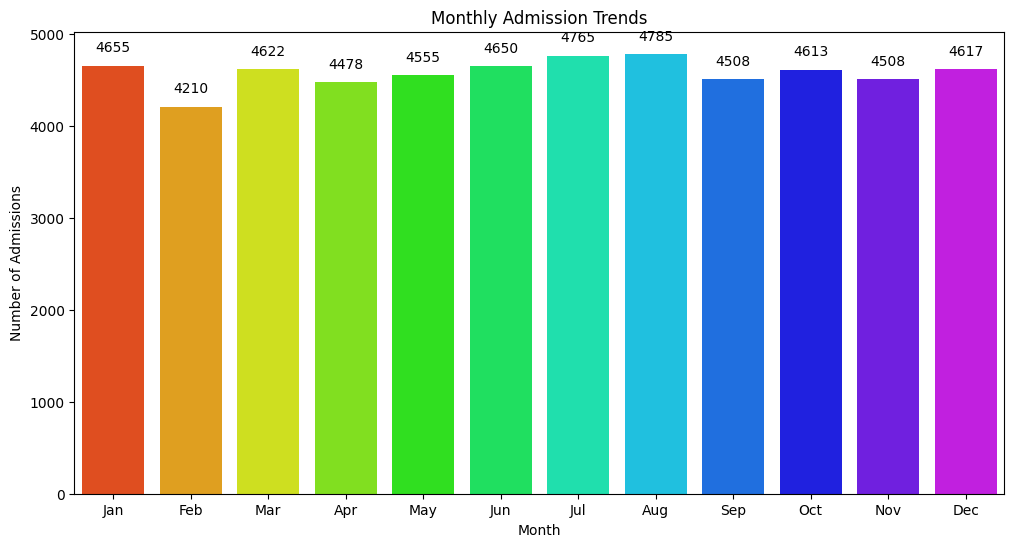

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_admissions.index, 
            y=monthly_admissions.values, 
            palette="gist_rainbow")

plt.title("Monthly Admission Trends")
plt.xlabel("Month")
plt.ylabel("Number of Admissions")

for index, value in enumerate(monthly_admissions.values):
    plt.text(index, value + 150, str(value), ha="center")

plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.show()

- <p style="color:purple;">Hospital admissions are 
    <b style="color:green; 
              background-color:yellow;">fairly consistent throughout the year</b>, indicating a steady inflow of patients.</p>
- <p style="color:purple;">
    <b style="color:green; background-color:yellow;">August (4785)</b> and 
    <b style="color:green; background-color:yellow;">July (4765)</b> saw the highest number of admissions, possibly reflecting seasonal factors or mid-year peaks in medical consultations.</p>
- <p style="color:purple;">
    <b style="color:green; 
              background-color:yellow;">February (4210) had the lowest admissions</b>, which may be attributed to its shorter duration.</p>
- <p style="color:purple;">Overall, there’s 
    <b style="color:green; background-color:yellow;">no sharp seasonal variation</b>, but a slight upward trend in the middle months is noticeable.</p>

<b style="color:blue;">Calculate Patient Length of Stay</b>

<p style="color:purple;">We’ll calculate the Length of Stay for each patient using the difference between their discharge and admission dates. </p>

In [48]:
df["Length of Stay"] = (df["Discharge Date"] - df["Date of Admission"]).dt.days
df["Length of Stay"].describe().round(2)

count    54966.00
mean        15.50
std          8.66
min          1.00
25%          8.00
50%         15.00
75%         23.00
max         30.00
Name: Length of Stay, dtype: float64

- <p style="color:purple;">Average stay: About 15.5 days</p>
- <p style="color:purple;">Median: 15 days, which means the data is fairly symmetrical.</p>
- <p style="color:purple;">Minimum stay: 1 day</p>
- <p style="color:purple;">Maximum stay: 30 days, no outrageous outliers, suggesting possible policy-based capping or data simulation bounds.</p>
- <p style="color:purple;">Interquartile Range (IQR): From 8 to 23 days, so 50% of patients stay within this window.</p>

<p style="color:purple;"> This indicates a moderate variation in patient hospital stays, typical in datasets covering a range of medical conditions, from short treatments to longer recoveries.</p>

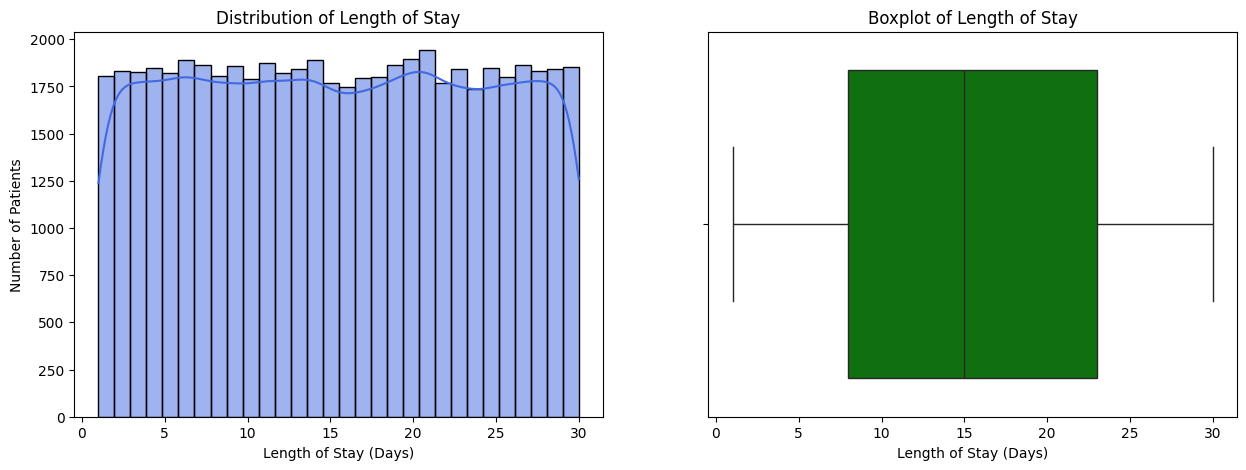

In [53]:
plt.figure(figsize=(15, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df["Length of Stay"], bins=30, kde=True, color="royalblue")
plt.title("Distribution of Length of Stay")
plt.xlabel("Length of Stay (Days)")
plt.ylabel("Number of Patients")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df["Length of Stay"], color="g")
plt.title("Boxplot of Length of Stay")
plt.xlabel("Length of Stay (Days)")

plt.show()

- <p style="color:purple;">
    <b>Uniform Distribution:</b> The length of stay is evenly distributed between 1 and 30 days.</p>
- <p style="color:purple;">
    <b>No Skewness or Outliers:</b> The data does not show any skewness or extreme outliers.</p>
- <p style="color:purple;">
    <b>Likely Synthetic:</b> Such a pattern is uncommon in real hospital data, where most patients have shorter stays and only a few stay longer.</p>

<p style="color:purple;">The plots show that the length of stay in our dataset is uniformly distributed across the 1–30 day range, with no unusual peaks or outliers. This suggests the data may be synthetic or intentionally balanced.</p>

<h2 style="color:green;">Patient Segmentation by Combining Features</h2>

<b style="color:blue;">Billing Amount by Medical Condition and Admission Type</b>

In [56]:
grouped_billing = df.groupby(["Medical Condition", 
                              "Admission Type"])["Billing Amount"].mean().unstack()
grouped_billing

Admission Type,Elective,Emergency,Urgent
Medical Condition,,,
Arthritis,25479.594393,25497.105304,25558.383172
Asthma,25253.907726,25893.700863,25761.368012
Cancer,25671.842547,24867.223481,24900.213989
Diabetes,26032.124823,25471.610224,25484.651029
Hypertension,25555.088796,25471.370343,25479.248761
Obesity,25687.732617,25820.553568,25903.815134


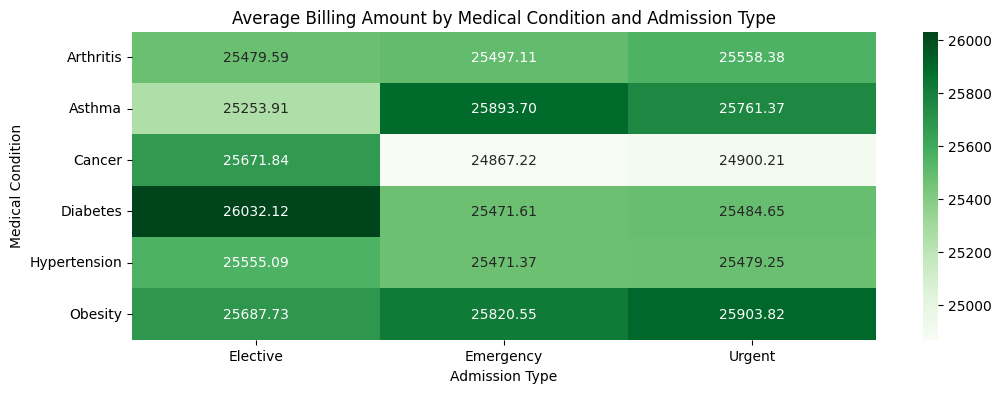

In [58]:
plt.figure(figsize=(12, 4))
sns.heatmap(grouped_billing, annot=True, fmt=".2f", cmap="Greens")

plt.title("Average Billing Amount by Medical Condition and Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Medical Condition")

plt.show()

<p style="color:purple;">There are no strong or actionable insights from this heatmap. The average billing amounts are very similar across all medical conditions and admission types, with no clear trends or outliers.</p>

<h2 style="color:green;">ML Algorithms</h2>

<b style="color:red;">While the dataset lacked meaningful real-world insights from a data analysis perspective, its synthetic nature made it ideal for experimenting with classification/regression models. So, let's try to perform some ML operations and see if we get any results this time.</b>

### Prepare the Data

<b style="color:blue;">Import required libraries</b>

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

<b style="color:blue;">Select Features and Target</b>

In [60]:
df_ml = df.copy()

<b style="color:blue;">Drop columns that aren't useful for prediction</b>

In [61]:
df_ml.drop(columns=["Name", "Doctor", "Hospital", "Insurance Provider", "Room Number", 
                    "Date of Admission", "Discharge Date", "Test Results"], inplace=True)

<b style="color:blue;">Encode categorical variables</b>

In [62]:
LE = LabelEncoder()

for column in df_ml.select_dtypes(include=["object"]).columns:
    df_ml[column] = LE.fit_transform(df_ml[column])

<b style="color:blue;">Split into Features and Target</b>

In [63]:
X = df_ml.drop("Medical Condition", axis=1)
y = df_ml["Medical Condition"]

<b style="color:blue;">Train-Test Split</b>

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train a Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

<b style="color:blue;">Initialize the model</b>

In [66]:
rf_model = RandomForestClassifier(random_state=42)

<b style="color:blue;">Fit the model</b>

In [67]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

<b style="color:blue;">Predict on test data</b>

In [68]:
y_pred = rf_model.predict(X_test)

<b style="color:blue;">Evaluate the model</b>

In [69]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.2877023831180644


In [70]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.28      0.28      1867
           1       0.29      0.29      0.29      1823
           2       0.29      0.29      0.29      1830
           3       0.29      0.28      0.29      1886
           4       0.29      0.29      0.29      1757
           5       0.29      0.28      0.29      1831

    accuracy                           0.29     10994
   macro avg       0.29      0.29      0.29     10994
weighted avg       0.29      0.29      0.29     10994



In [71]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[528 273 257 273 261 275]
 [295 537 285 244 227 235]
 [281 251 538 276 246 238]
 [312 273 274 533 244 250]
 [271 278 222 245 516 225]
 [271 265 266 240 278 511]]


<h2 style="color:green;">Final Conclusion</h2>

<p style="color:purple;">This project aimed to explore and analyze a healthcare dataset using various data analysis techniques. We followed a complete, structured workflow — beginning with data cleaning, exploring distributions, and uncovering potential insights through visualizations.</p>

<p style="color:purple;">Despite our efforts, we observed that the dataset lacked real-world complexity and appeared synthetic. Features such as gender, blood type, and medical conditions were uniformly distributed, with no clear trends or anomalies. Visualizations mostly showed flat or balanced patterns, and even advanced analyses (like billing trends, admission types, and length of stay) did not reveal meaningful insights.</p>

<p style="color:purple;">In an effort to add more depth, we also experimented with machine learning techniques. However, the results confirmed our earlier suspicions — the synthetic nature of the dataset led to poor predictive performance, with models failing to capture any strong relationships between features and the target variable.</p>

<p style="color:purple;">That said, this project served as a valuable learning experience. It allowed us to:</p>

- <p style="color:purple;">Practice real-world data analysis workflow using Python libraries like NumPy, Pandas, Matplotlib, and Seaborn.</p>
- <p style="color:purple;">Develop and evaluate machine learning models using Scikit-learn.</p>
- <p style="color:purple;">Strengthen our documentation and analytical storytelling approach.</p>

<p style="color:purple;">While this dataset didn’t yield strong business insights, the end-to-end pipeline built during this project is a great foundation and can be used as a reference for future, more meaningful projects.</p>